# Lecture 8 - Feature Selection, Clustering with k-Means  *

# Table of Contents
* [Lecture 8 - Feature Selection, Clustering with k-Means  *](#Lecture-8---Feature-Selection,-Clustering-with-k-Means--*)
	* &nbsp;
		* [Content](#Content)
		* [Learning Outcomes](#Learning-Outcomes)
* [Feature Selection $^1$](#Feature-Selection-$^1$)
	* [Demo](#Demo)
		* [Machine learning with no feature selection](#Machine-learning-with-no-feature-selection)
		* [Machine learning with feature selection](#Machine-learning-with-feature-selection)
* [Unsupervised Machine Learning (Clustering)](#Unsupervised-Machine-Learning-%28Clustering%29)
	* [What is a cluster?](#What-is-a-cluster?)
	* [Distance and Similarity Measures](#Distance-and-Similarity-Measures)
	* [Clustering Algorithms](#Clustering-Algorithms)
		* [Tree Builders](#Tree-Builders)
		* [Centre Seekers](#Centre-Seekers)
		* [Issues with k-means:](#Issues-with-k-means:)
		* [Evaluating clustering](#Evaluating-clustering)
			* [Cohesion and Separation](#Cohesion-and-Separation)
		* [Warning](#Warning)
		* [To summarize:](#To-summarize:)
	* [Clustering Using scikit-learn](#Clustering-Using-scikit-learn)


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

---

### Content

1. How do features affect generalisability of classifiers? 
2. What is unsupervised learning?
3. Clustering with k-Means
4. Evaluating clustering - cluster cohesion and separation
5. Using scikit-learn for clustering

### Learning Outcomes

At the end of this lecture, you should be able to:

* perform feature analysis
* explain the motivation behind clustering
* recognise the types of problems that unsupervised machine learning (clustering) is applied to 
* explain the k-means clustering algorithm
* apply the k-means algorithm and interpret its output
* evaluate the results of clustering
* apply clustering from scikit-learn


---

\* Some material on clustering is sourced from Janert, P. K. (2010). Data analysis with open source tools. O'Reilly Media, Inc

# Feature Selection $^1$

The main purpose of machine learning is to produce classifiers that generalise in their predictive accuracy beyond the datasets used to train them. To a large degree, **their final accuracy is dependent on the descriptive strength and quality of the features** that constitute the training dataset. 

**It is often tempting to simply provide a machine learning algorithm with as many features as are available for a given dataset. However, doing so has been consistently shown to be associated with negative outcomes.**

The inclusion of large feature numbers in a training dataset presents **computational challenges** that mostly arise during the training phase and can be prohibitive for some algorithms, but can also be a **strain during the detection time** for real-time systems processing high-volume data streams. Unnecessary and **redundant features** increase the search space for a machine learning algorithm. This in turn**dilutes the signal strength of a true pattern** and makes it more likely that due to the presence of noisy and irrelevant features, a spurious pattern will be discovered instead. 

In general it is not known *a priori* which features are meaningful, and **finding the optimal feature subset has been proven to be a NP-complete problem**. Nonetheless, it is still imperative that feature selection algorithms be applied to a dataset as a pre-processing step before training classifiers, in order to reduce feature dimensionality. 

**Not only are both the computational complexity and the generalisability improved by selecting the most concise subset, but the resulting model is more interpretable due to the fact that it is generated with the fewest possible number of parameters.** 

There are many algorithms and techniques available to perform feature selection. Some of the more commonly used are: Chi$^2$, Information Gain, PCA, LDA, Gain Ratiom Gini Index, SVM. 

Feature selection techniques can generally be divided into two broad categories. **Filter methods** are univariate techniques which consider the relevance of a particular feature in isolation to the other features and rank the features according to a metric. These algorithms are computationally efficient since they do not integrate the machine learning algorithm in its evaluation. However, they can be susceptible to selecting subsets of features that may not produce favourable results when combined with a chosen machine learning algorithm. These methods lack the ability to detect interactions among features as well as feature redundancy. 

On the other hand, **wrapper methods** overcome some of these shortcomings. They explicitly use the chosen machine learning algorithm to select the feature subsets and tend to outperform filter methods in predictive accuracy. However, these techniques exhibit bias in favour of a specific machine learning algorithm, and since they are computationally more intensive, they are also frequently impractical on large datasets.

Hybrid filter-wrapper methods have been a subject of recent research due to their ability to exploit the strengths of both strategies. Hybrid approached essentially allow any combination of filter and wrapper methods to be combined. Due to this, some novel and interesting hybrid approaches have recently been proposed such as: using the union of feature-subset outputs from Information Gain, Gain Ratio, Gini Index and correlation filter methods as inputs to the the wrapper Genetic Algorithm, hybridization of the Gravitational Search Algorithm with Support Vector Machine and using Particle Swarm Optimisation-based multi-objective feature selection approach in combination with k-Nearest-Neighbour. Given their flexibility, hybrid approaches thus offer some degree of tuning the trade-offs between accuracy and performance. Nonetheless, devising a feature selection algorithm that is both highly accurate and computationally efficient is still an open question.

For reasons of simplicity, we will consider only filter methods here, and more specifically we will look at Chi$^2$. Chi$^2$ performs a statistical test which ascertains if a given feature and class label are independent. A test result which indicates strong dependence between feature values and the associated class label, means that the given feature possesses discriminative ability. The scores of all feature vectors are then ranked resulting in an ordering of feature usefulness. The Chi$^2$ test does not take into account dependence between feature vectors themselves and is thus unable to detect feature redundancy.

Chi$^2$ is designed to work with feature counts on categorical data that results in non-negative values. However, Chi$^2$ can be used on continuous data by discretizing the feature vectors and counting the occurrences of feature values in the given bins. 

> $^1$ Susnjak, T., Kerry, D., Barczak, A., Reyes, N., & Gal, Y. (2015, November). Wisdom of Crowds: An Empirical Study of Ensemble-Based Feature Selection Strategies. In Australasian Joint Conference on Artificial Intelligence (pp. 526-538). Springer International Publishing.

## Demo 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math 
#import mpld3
from sklearn import preprocessing
from sklearn import neighbors

%matplotlib inline

In [5]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [45]:
grades = pd.read_csv('grades_prediction_mode.csv')
print grades.head()
grades = grades.dropna()

   Unnamed: 0   A1    A2   A3    A4    A5     CW  Exam  Total Grade Mode
0           0  3.5  5.50  7.5   6.5   7.5  30.50  30.0  60.50    B-  INT
1           1  2.5  4.50  3.2   3.8   NaN  14.00  10.0  24.00     E  INT
2           2  4.0  5.25  7.1  10.2  11.5  38.05  31.0  69.05     B  INT
3           3  4.0   NaN  3.0   7.7   9.5  24.20  23.0  47.20     R  INT
4           4  4.5  4.75  7.4  10.3   8.8  35.75  40.0  75.75    B+  EXT


### Machine learning with no feature selection 

In [46]:
# create numeric column for the response
# note: features and response must both be entirely numeric!
mapping = {'A+':0, 'A':1, 'A-':2 ,'B+':3, 'B':4, 'B-':5, 'C+':6, 'C':7, 'R':8, 'D':9,'E':10, 'DNC':11}
#mapping = {'A+':0, 'A':0, 'A-':0 ,'B+':1, 'B':1, 'B-':1, 'C+':2, 'C':2, 'R':3, 'D':4,'E':4, 'DNC':4}
grades['grade_num'] = grades.Grade.map(mapping)

# create X (features) three different ways
X = grades [['A1', 'A2', 'A3', 'A4', 'A5', 'Exam']]

# create y (response)
y = grades.grade_num

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [48]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)

In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print X_train.shape

(72, 6)


In [50]:
print "Test accuracy for NB (no feature selection):", nb.fit(X_train, y_train).score(X_test, y_test)
print "Test accuracy for Tree (no feature selection):", treeclf.fit(X_train, y_train).score(X_test, y_test)

Test accuracy for NB (no feature selection): 0.263157894737
Test accuracy for Tree (no feature selection): 0.263157894737


In [51]:
from sklearn import metrics
print 'NB', metrics.classification_report(y_test, nb.predict(X_test))
print 'tree', metrics.classification_report(y_test, treeclf.predict(X_test))

NB              precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         1
          3       0.50      0.25      0.33         4
          4       0.40      0.40      0.40         5
          5       0.25      1.00      0.40         1
          6       0.17      0.50      0.25         2
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         2
         10       0.00      0.00      0.00         1

avg / total       0.24      0.26      0.22        19

tree              precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         1
          3       0.75      0.75      0.75         4
          4       1.00      0.20      0.33         5
          5       0.09      1.00      0.17         1
          6       0.00      0.00      0.00         2
          7       0.00      0.00  

In [52]:
print 'NB \n',metrics.confusion_matrix(y_test, nb.predict(X_test))
print 'tree \n',metrics.confusion_matrix(y_test, treeclf.predict(X_test))

NB 
[[0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 1 3 0 0 0 0 0]
 [0 0 1 2 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 0 0 0]]
tree 
[[0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 3 0 0 0 0 0 0]
 [0 0 1 1 3 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]]


### Machine learning with feature selection

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
X_new = SelectKBest(chi2, k=4).fit_transform(X, y)
X_new.shape

(91L, 4L)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=1, test_size=0.2)

In [56]:
print "Test accuracy for NB (with feature selection):", nb.fit(X_train, y_train).score(X_test, y_test)
print "Test accuracy for Tree (with feature selection):", treeclf.fit(X_train, y_train).score(X_test, y_test)

Test accuracy for NB (with feature selection): 0.421052631579
Test accuracy for Tree (with feature selection): 0.263157894737


**Exercise:** Given the Wine dataset, perform classification as above using all features for classification and then using a subset of the features. Split your train/test datasets 50/50. Report on the experimental findings. 

In [57]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2



---

# Unsupervised Machine Learning (Clustering)

So far we have learned how to use **supervised machine learning** techniques like classification and regression. 

In supervised learning, we new exactly what the inputs and its expected outputs were. We would provide our machine learning algorithm with the **inputs** and ask it to **learn** to uncover the underlying patterns which would allow it to **correctly map to the provided corresponding outputs**. 

When deploying a classifier of this type, we would subsequently provide it with inputs that it has not seen before and expect it to **produce informed outputs** (class labels or continuous values) based on what the classifier has learned before.

**Clustering** is a family of **unsupervised machine learning techniques**. It operates in a fundamentally different way to classification and regression. 

Clustering is a **method for discovering and visualising distinct groups** of similar data points. The purpose of clustering is to **find structure** and **discover patterns** in a dataset where no one piece of data within it provides a definitive answer. 

Clustering is often seen as an **exploratory method** which is a computationally-driven approach to discovering structure in data. It is to a large degree subjective and requires a strong understanding of the problem domain in order to ascribe meaning to the results.  The result of clustering are always sets of clusters; however, this does not necessarily mean that the clusters are significant, possess any real meaning and thus are present in the real-world domain from which the data originated. Many times the results will be devoid of meaning or very hard to make sense of. 

Clustering is heavily used in data-intensive domains. Examples of usage: groups of customers with similar buying patterns can automatically be detected by retailers who track customer purchases (loyalty/reward cards) and **marketing or retail strategies** can be developed from this; identification of areas of similar land use in an **earth observation** database; in **insurance** settings, groups of motor insurance policy holders with a high average claim cost can be identified; groups of similar houses according to their house type, value, and geographical location can be identified in **city planning** scenarios; in **medicine**, clustering can be used in automatically identifying cancerous cells in datasets without any prior labelling; **computational biology** also employs clustering to discover groups of genes that exhibit similar behaviour, which might indicate that they respond to a treatment in the same way or are part of the same biological pathway.

## What is a cluster?

The concept of a "cluster" is in fact not well defined and lacks theoretical rigour.

Simply saying **"a cluster is a set of similar points"** is in many ways **insufficient**. The same goes for **"a cluster is a group of points that are close together"**. The reason that these descriptions are insufficient is because clusters **must also be well separated** from each other.

![Source Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc](figures/cluster_uniform.jpg)

Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc


An arguably more precise definition of what a cluster is: **"contiguous regions of high data point density separated by regions of lower point density".**


![Source Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc](figures/cluster_smile.jpg)

> Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc

The previous definition of what regions of clusters should be opens up the possibilities for many types of very different clusters.

The image below depicts regions of clusters made up of **graph-like relationships** rather than **point density**. In addition, this example depicts  scenarios where we observe **nested clusters** within other clusters. 

![Source Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc](figures/cluster_graph.jpg)

> Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc


Cluster analysis does not need to be limited to just points in space, but can involve **strings as well non-geometric data like time-series**. The challenge in these scenarious then becomes of **how we define the notion of "similarity".** 

![Source Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc](figures/cluster_strings_time_series.jpg)

> Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc

Final examples of clusters which are easily discernible by human eyes but difficult to train computers to do are expressed in the images below. The **intertwining of the clusters** in one dataset and the **intersection of two clusters** in the other are a particular **challenge** to clustering algorithms and not trivially solved.


![Source Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc](figures/cluster_complexity.jpg)

> Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc

## Distance and Similarity Measures

In the same way that we defined distance metrics in our usage of the kNN algorithm, the **clustering algorithms also require the definition of a function that returns a scalar value to denote distance or similarity between two points**. Whether the function expresses the distance or similarity between two points is a matter of choice and the domain - distance can be transformed into similarity and vice versa.

The image below shows examples of some of the popular distance and similarity measures, including some we have already covered in this course. Despite its simplicity, the **Euclidean** distance metric remains one of the most widely used on numerical domains.

Just as we discovered that data comprising of **different scales** can have a **negative effect** on the kNN algorithm, the same is true in clustering. Whenever we employ distance metrics like Euclidean, we **must perform normalization** before applying the clustering algorithm. Correlation-based similarity metrics are however resistant to range variability within data.


![Source Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc](figures/cluster_distance_similarity.jpg)

> Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc

## Clustering Algorithms

There are different families of clustering algorithms.

### Tree Builders

Tree building clustering algorithms construct **decision tree-like structures** by successively combining clusters that are “close” to each
other into a larger cluster until only a single cluster remains. This technique is known as
**agglomerative hierarchical clustering**. The final cluster representation is a tree-like hierarchy of clusters. 

Clusters that exhibit similarity are merged early, constituting the leaves part of a tree. More dissimilar 
clusters are joined later in the process, nearer the root of the tree. 

The resulting structure can be represented graphically in a **dendrogram** (seen in the image below that depicts clusters of blogs based on word usage from which topics emerge). To extract actual clusters from it, we need to walk the tree, evaluate the cluster properties for each subtree,
and then cut the tree to obtain clusters.

![Source Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc](figures/cluster_dendrogram.jpg)

Tree building clustering algorithms are very **computationally intensive**. However, their advantage is that they do not just produce a flat list of clusters, but instead **explicitly show the relationships** between the clusters that can then be interpreted for meaning.

### Centre Seekers

The most widely used category of clustering algorithms is the **k-means** family. 

The k-means algorithm is an **iterative algorithm**. The algorithm requires at the outset that the number of **expected clusters k be specified** as input to it. The key principle behind the algorithm is to **repeatedly re-calculate the centre or the centroid of each cluster**, and re-assign all the points to each centroid depending on their distance from it. This process is repeated until a predefined convergence is achieved or the maximum number of iterations are carried out.


![Segaran, T. (2007). Programming collective intelligence: building smart web 2.0 applications.  O'Reilly Media, Inc.](figures/cluster_kmeans.jpg)


> Image Source: Segaran, T. (2007). Programming collective intelligence: building smart web 2.0 applications. " O'Reilly Media, Inc.".

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
#import mpld3
import math 
import matplotlib.pyplot as plt
import random

%matplotlib inline

df = pd.io.parsers.read_csv(
    'wine_data.csv',
     usecols=[0,6,7]
    )

df.columns=['Class','Magnesium','Flavanoids']
df.head()

,Class,Magnesium,Flavanoids
0,1,2.80,3.06
1,1,2.65,2.76
2,1,2.80,3.24
3,1,3.85,3.49
4,1,2.80,2.69


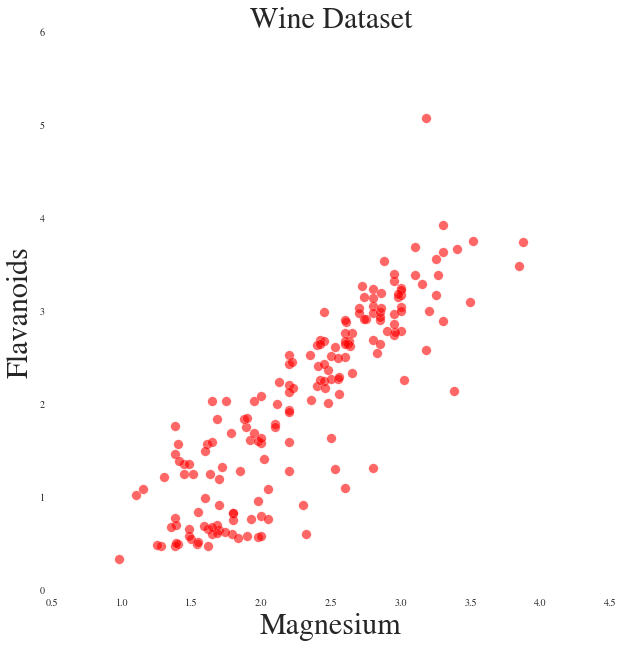

In [7]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.grid()
axes.set_xlabel('Magnesium',fontsize=30)
axes.set_ylabel('Flavanoids',fontsize=30)
plt.title('Wine Dataset',fontsize=30)
axes.scatter(df.Magnesium, df.Flavanoids, s=90, alpha=0.6, c='red')

We first need to normalise the data:

In [8]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Magnesium','Flavanoids']])
df[['Magnesium','Flavanoids']] = minmax_scale.transform(df[['Magnesium','Flavanoids']])

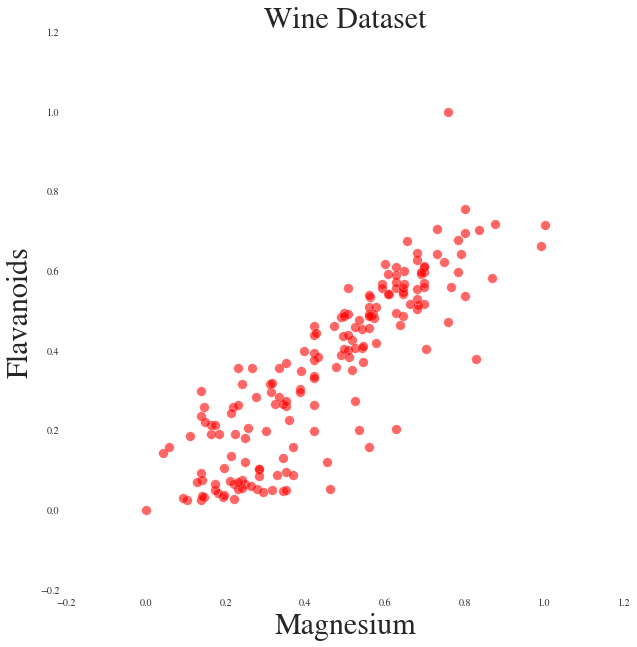

In [9]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
axes.set_xlabel('Magnesium',fontsize=30)
axes.set_ylabel('Flavanoids',fontsize=30)
plt.title('Wine Dataset',fontsize=30)
axes.scatter(df.Magnesium, df.Flavanoids, s=90, alpha=0.6, c='red')

The cetroid is critical to understanding k-means. It is the average position of all the points in a set of data instances. In our often n-dimensional spaces, the centroid is the mean position of all the points in all of the coordinate directions i.e. it is the mean of each feature type.

**Exercise 1:** Find the centroid for all the data points in the above graph and plot it as a black dot in the graph:

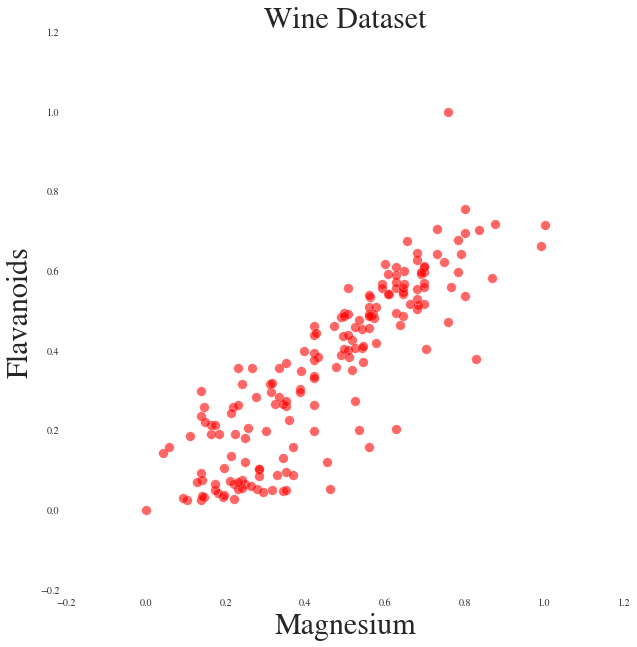

In [29]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
axes.set_xlabel('Magnesium',fontsize=30)
axes.set_ylabel('Flavanoids',fontsize=30)
plt.title('Wine Dataset',fontsize=30)

axes.scatter(df.Magnesium, df.Flavanoids, s=90, alpha=0.6, c='red')
#YOUR CODE HERE


The basic algorithm can be summarized as follows: 

1. Randomly pick **k** centroids (or points that will be the center of your clusters) in multi dimensional d-space. Strive to make them near the data but away from each another.
2. Assign each data point to the closest centroid.
3. Move the centroids to the average location of the data points assigned to it.
4. Repeat the preceding two steps until the assignments no longer change - or change very little.

When randomly selecting the initial centroid(s) for the kmeans algorithm, it is important that the randomly chosen centroid is within the data range for each of the feature types.

**Exercise 2:**  Using the data above, randomly select a centroid that is within the range of values for Flavanoids and Magnesium and plot it as a black dot. (Use random.uniform(x_min,x_max) to generate a random number in the range x_min amd x_max)

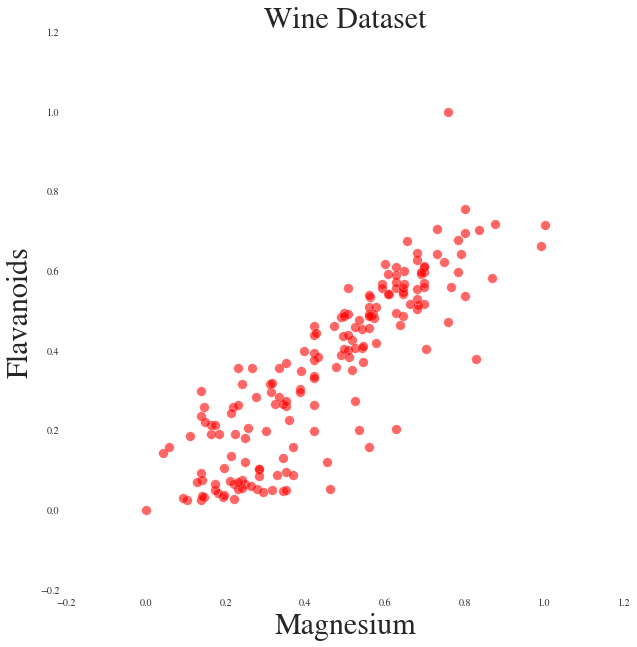

In [30]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.grid()
axes.set_xlabel('Magnesium',fontsize=30)
axes.set_ylabel('Flavanoids',fontsize=30)
plt.title('Wine Dataset',fontsize=30)
axes.scatter(df.Magnesium, df.Flavanoids, s=90, alpha=0.6, c='red')

#YOUR CODE HERE


**Exercise 3:** Given two centroids ([1,3] and [1.5,3]) in the graph below, calculate the closest points to each of the centroids using the Euclidean distance defined below. Then, calculate the centroid of each of the samples assigned to each of the centroids. Make the centroids of each of the two groups of points the new centroid, and plot

In [31]:
def eucledean_distance(x, y):
    d = 0.0
    
    for i in range(len(x)):
        d += (x[i] - y[i])**2
    d = math.sqrt(d)
    
    return d

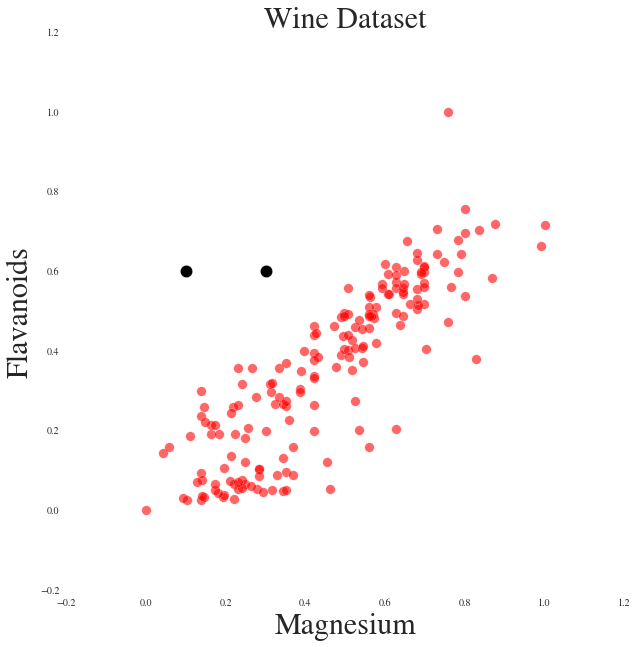

In [32]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
axes.set_xlabel('Magnesium',fontsize=30)
axes.set_ylabel('Flavanoids',fontsize=30)
plt.title('Wine Dataset',fontsize=30)
axes.scatter(df.Magnesium, df.Flavanoids, s=90, alpha=0.6, c='red')
axes.scatter(0.1, 0.6, s=150, alpha=1, c='black')
axes.scatter(0.3, 0.6, s=150, alpha=1, c='black')

#YOUR CODE HERE



The k-means algorithm is **nondeterministic**. This means that different starting values may produce very **different results**. Given this, it is expected that the algorithm be **run multiple times** with different randomly selected starting values and to then compare results.

**k-means cannot be used for categorical data** unless the distance/similarity function is redefined for categorical data. One option is to use Jaccard similarity:

In [20]:
def jaccard_similarity(x,y):
    x = set(x)
    y = set(y)
    intersection = len(set.intersection(x,y))
    union = len(set.union(x, y))
    return intersection / float(union)

In [21]:
1 - jaccard_similarity(['apples','bananas','oranges','kiwi','chrries'],['apples','bananas','oranges','grapefruit','grapes'])

0.5714285714285714

In [22]:
1 - jaccard_similarity(['apples','bananas','oranges','kiwi','chrries'],['apples','berries','pears','grapefruit','grapes'])

0.8888888888888888

In [23]:
def categorical_variable_distance(s1, s2):
    if len(s1) != len(s2):
        raise ValueError("Sequences are of unequal length")
    number_of_matches = sum(ch1 == ch2 for ch1, ch2 in zip(s1, s2))
    
    return (number_of_matches) / float(len(s1))

In [24]:
1 - categorical_variable_distance(['apples','bananas','oranges','kiwi','chrries'],['apples','bananas','oranges','grapefruit','grapes'])

0.4

In [25]:
1 - categorical_variable_distance(['apples','bananas','oranges','kiwi','chrries'],['apples','berries','pears','grapefruit','grapes'])

0.8

### Issues with k-means:

- **Choosing k is more an art than a science**, although there are bounds: 1≤k ≤n, where n is number of data points.

- There are **convergence issues** — the solution can fail to exist, if the algorithm falls into a loop, for example, and keeps going back and forth between two possible solutions, or in other words, there isn’t a single unique solution.

- **Interpretability** can be a problem—sometimes the answer isn’t at all useful. Indeed that’s often the biggest problem. In spite of these issues, it’s pretty fast (compared to other clustering algorithms), and there are broad applications in marketing, computer vision (partitioning an image), or as a starting point for other models

> Schutt, R., & O'Neil, C. (2013). Doing Data Science: Straight Talk from the Frontline. " O'Reilly Media, Inc.".

Below is adapted python code for kmeans from:

> Segaran, T. (2007). Programming collective intelligence: building smart web 2.0 applications. " O'Reilly Media, Inc.".

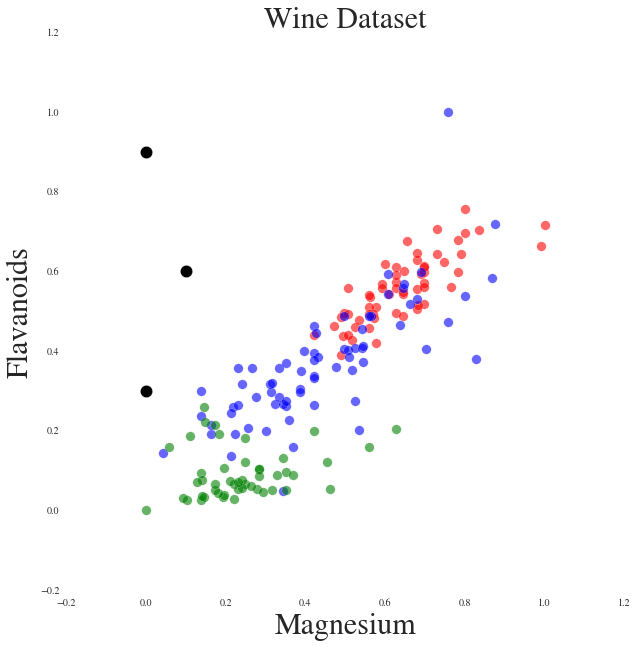

In [26]:
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.set_xlabel('Magnesium',fontsize=30)
axes.set_ylabel('Flavanoids',fontsize=30)
plt.title('Wine Dataset',fontsize=30)
axes.grid()
axes.scatter(df.Magnesium.where(df.Class == 1), df.Flavanoids.where(df.Class == 1), s=90, alpha=0.6, c='red')
axes.scatter(df.Magnesium.where(df.Class == 2), df.Flavanoids.where(df.Class == 2), s=90, alpha=0.6, c='blue')
axes.scatter(df.Magnesium.where(df.Class == 3), df.Flavanoids.where(df.Class == 3), s=90, alpha=0.6, c='green')

#[[0,0.9],[0.1,0.6],[0, 0.3]]

axes.scatter(0,0.9, s=150, alpha=1, c='black')
axes.scatter(0.1,0.6, s=150, alpha=1, c='black')
axes.scatter(0, 0.3, s=150, alpha=1, c='black')

In [33]:
def kmeans_cluster(rows, distance = eucledean_distance, k = 3, iter = 10):
    
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows])) for i in range(len(rows[0]))]
    print ranges
    
    # Create k randomly placed centroids
    #centroids=[[random.random( ) * (ranges[i][1] - ranges[i][0]) + ranges[i][0]  for i in range(len(rows[0]))] for j in range(k)]
    centroids=[[0,0.9],[0.1,0.6],[0, 0.3]]
    print centroids
    
    prev_cluster_labels = None
    for t in range(iter):
        #print 'Iteration %d' % t
        cluster_labels = [[] for i in range(k)]
        #print cluster_labels
        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row = rows[j]
            best_match = 0
            for i in range(k):
                d = distance(centroids[i],row)
                if d < distance(centroids[best_match],row): 
                    best_match=i
            cluster_labels[best_match].append(j)
            
        # If the results are the same as last time, this is complete
        if cluster_labels == prev_cluster_labels:
            break
        prev_cluster_labels = cluster_labels
    
        # Move the centroids to the average of their members
        for i in range(k):
            avgs = [0.0] * len(rows[0])
            if len(cluster_labels[i]) > 0:
                for rowid in cluster_labels[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m] += rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(cluster_labels[i])
                centroids[i] = avgs
            
    return cluster_labels, centroids

[(0.0, 1.0), (0.0, 0.99999999999999978)]
[[0, 0.9], [0.1, 0.6], [0, 0.3]]


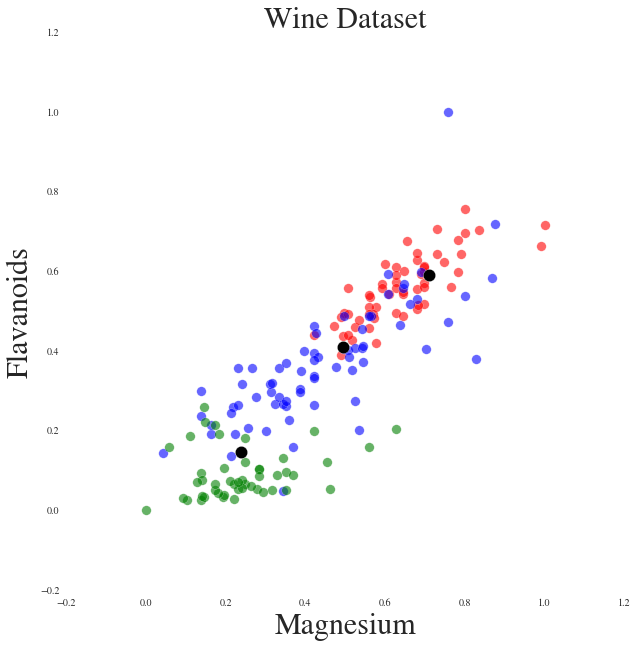

In [34]:
labels, centroids = kmeans_cluster(rows=df[['Magnesium','Flavanoids']].values,k = 3, iter = 100)
#print labels, centroids
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.set_xlabel('Magnesium',fontsize=30)
axes.set_ylabel('Flavanoids',fontsize=30)
plt.title('Wine Dataset',fontsize=30)
axes.grid()

axes.scatter(df.Magnesium.where(df.Class == 1), df.Flavanoids.where(df.Class == 1), s=90, alpha=0.6, c='red')
axes.scatter(df.Magnesium.where(df.Class == 2), df.Flavanoids.where(df.Class == 2), s=90, alpha=0.6, c='blue')
axes.scatter(df.Magnesium.where(df.Class == 3), df.Flavanoids.where(df.Class == 3), s=90, alpha=0.6, c='green')


axes.scatter(centroids[0][0],centroids[0][1], s=150, alpha=1, c='black')
axes.scatter(centroids[1][0], centroids[1][1], s=150, alpha=1, c='black')
axes.scatter(centroids[2][0], centroids[2][1], s=150, alpha=1, c='black')

plt.show()

### Evaluating clustering

#### Cohesion and Separation

We can evaluate each cluster based and its **cohesion** value. Cohesion describes the **closeness of the points within a cluster**. It is **average distance** of all the points in the cluster to the cluster centroid.
 

**Separation** defines the average distance between a cluster and all the points outside of the cluster.

Given the definition of the cohesion and separation for a single cluster, this can easily be extended to produce a measure of the overall clustering for a given problem. We can use the average cohesion and average separation (preferably weighted by each cluster mass which is the number of samples in each cluster) to give us global metrics for evaluating a clustering solution.  
 
![.](figures/cluster_cohesion_separation.jpg)


Once we have calculated the global cohesion and separation values for each cluster, we can combine them into a single value that represents the ratio:

$\frac{separation}{cohesion}$

where we expect the ratio to increase as the separability and the cohesion of a clustering solution improve.

> Janert, P. K. (2010). Data analysis with open source tools. O'Reilly Media, Inc

**Exercise 4:** The kmeans_cluster cluster function above returned a list of labels (indexes) of all samples assigned to each cluster as well as a list of centroids for each cluster. Calculate the cohesion for cluster [0].

In [ ]:
rows = df[['Magnesium','Flavanoids']].values

dist = 0.0
mass = 0

for row in labels[0]:
    #YOUR CODE HERE
    

**Exercise 5:**  Calculate the separation of cluster [0] to elements in cluster [1].

In [ ]:
sep = 0.0
num = 0
for row in labels[1]:
    #YOUR CODE HERE


**Exercise 6:**  Calculate the separation of cluster [0] to all clusters.

In [ ]:
total_sep = 0.0
num = 0
for c in range(1,3):
    for row in labels[c]:
        #YOUR CODE HERE
        

### Warning

- Clustering is fun and fascinating but it can also lead you astray and become a waste of time. Obtaining useful results is often difficult. Interpretation is a challenge.

- We tend to assume that our dataset has clusters, or a certain number, and this may prove to be wrong assumption.

- Assuming you have found clusters and are able to draw out some meaning from them, the field is still lacking rigorous tools to evaluate the findings and even to know exactly what to do with them.

- A good starting point with clustering is to formulate the question you are wanting to answer at the outset, together with hypotheses and then use the data to validate or disprove them.

### To summarize:

• The k-means algorithms and its variants work best for globular (at least star-convex)
clusters. The results will be meaningless for clusters with complicated shapes and for
nested clusters.

• The expected number of clusters is required as an input. If this number is not known, it
will be necessary to repeat the algorithm with different values and compare the results.

• The algorithm is iterative and nondeterministic; the specific outcome may depend on
the choice of starting values.

• The k-means algorithm requires vector data; use a different distance method for categorical data

• The algorithm can be misled if there are clusters of highly different size or different
density.

• The k-means algorithm is linear in the number of data points; the k-medoids algorithm
is quadratic in the number of points.

> Janert, P. K. (2010). Data analysis with open source tools. O'Reilly Media, Inc

## Clustering Using scikit-learn

In [10]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [11]:
km = KMeans(n_clusters=3, init='random')

In [13]:
df.head()

,Class,Magnesium,Flavanoids
0,1,0.627586,0.573840
1,1,0.575862,0.510549
2,1,0.627586,0.611814
3,1,0.989655,0.664557
4,1,0.627586,0.495781


In [14]:
df.tail()

,Class,Magnesium,Flavanoids
173,3,0.241379,0.056962
174,3,0.282759,0.086498
175,3,0.210345,0.073840
176,3,0.231034,0.071730
177,3,0.368966,0.088608


In [15]:
df[['Magnesium','Flavanoids']].values

array([[ 0.62758621,  0.57383966],
       [ 0.57586207,  0.51054852],
       [ 0.62758621,  0.61181435],
       [ 0.98965517,  0.66455696],
       [ 0.62758621,  0.49578059],
       [ 0.78965517,  0.64345992],
       [ 0.52413793,  0.45991561],
       [ 0.55862069,  0.45780591],
       [ 0.62758621,  0.55696203],
       [ 0.68965517,  0.592827  ],
       [ 0.67931034,  0.62869198],
       [ 0.42068966,  0.44092827],
       [ 0.55862069,  0.51054852],
       [ 0.73103448,  0.70675105],
       [ 0.8       ,  0.69620253],
       [ 0.64482759,  0.54219409],
       [ 0.62758621,  0.5907173 ],
       [ 0.67931034,  0.64556962],
       [ 0.8       ,  0.75738397],
       [ 0.59310345,  0.56751055],
       [ 0.69655172,  0.59704641],
       [ 0.49310345,  0.43670886],
       [ 0.56206897,  0.53586498],
       [ 0.51724138,  0.42827004],
       [ 0.53448276,  0.47890295],
       [ 0.56896552,  0.49367089],
       [ 0.64482759,  0.54852321],
       [ 0.48965517,  0.39029536],
       [ 0.67931034,

In [16]:
km.fit(df[['Magnesium','Flavanoids']].values)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [17]:
predictions = km.predict(df[['Magnesium','Flavanoids']].values)
predictions

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1,
       2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Another useful measure that provides a useful global figure that expresses how well the clustering has performed is the **Silhouette Coefficient (SC)**.

The SC is calculated for each point as follows:

a = average distance to all other points in its cluster

b = average distance to all other points in the next nearest cluster

SC = (b-a)/max(a, b)

SC is in the range from -1 (worst) to 1 (best).

A global SC is calculated by taking the average of the SC for all points.

In [18]:
from sklearn import metrics
metrics.silhouette_score(df[['Magnesium','Flavanoids']].values, predictions)

0.48174816355972766

Since k-means essentially attempts to minimise the within-cluster sum of squares (WCSS), we can experimentally visualise this property for a range of k values in order to ascertain what is the ideal number of clusters - aiming for the smallest possible and the lowest WCSS.

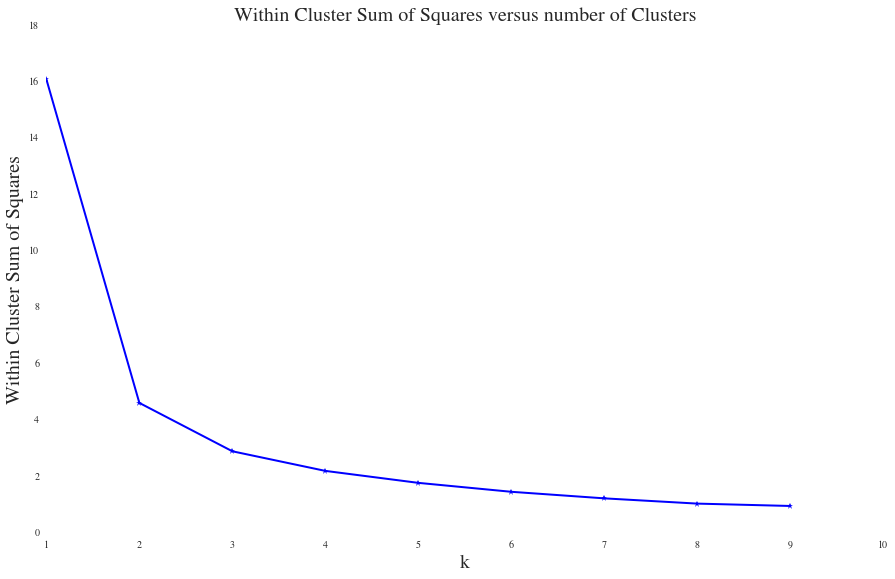

In [19]:
k_rng = range(1,10)
est = [KMeans(n_clusters = k).fit(df[['Magnesium','Flavanoids']].values) for k in k_rng]

# Generally want to minimize WSS, while also minimizing k
within_cluster_sum_squares = [e.inertia_ for e in est]
fig, axes = plt.subplots()
fig.set_size_inches(15,20)
# Plot the results
plt.subplot(212)
plt.plot(k_rng, within_cluster_sum_squares, 'b*-')
plt.xlim([1,10])
plt.grid(True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Within Cluster Sum of Squares', fontsize=20)
plt.title('Within Cluster Sum of Squares versus number of Clusters', fontsize=20)

**Exercise:**

Given below is a dataset sourced from https://raw.githubusercontent.com/justmarkham/DAT7/master/data/beer.txt which contains information on properties of some of the most popular beer brands in the US:


In [64]:
beer_df = pd.read_csv('beer.csv')
beer_df


,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


Your task it to perform clustering on this dataset and evaluate the meaning of the clusters. 

In [ ]:
#YOUR CODE HERE




In [ ]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});